In [82]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ast
from hans_prediction import *
from tqdm import tqdm, trange

%autosave 20

Autosaving every 20 seconds


## BERT (varying data usage)

#### seed 42

In [83]:
mnli_eval_acc_42 = [69.67, 75.2, 76.79, 78.32, 79.04, 79.98, 80.46, 81.25, 81.27, 82.00]
mnli_mm_eval_acc_42 = [70.84, 76.1, 78.26, 79.31, 79.98, 80.69, 81.19, 81.87, 82.06, 82.53]

hans_ent_lo_42 = np.array([96.12, 98.3, 98.4, 98.34, 98.22, 98.18, 98.4, 98.58, 98.84, 99.02])
hans_ent_sub_42 = np.array([99.1, 99.62, 99.68, 99.6, 99.62, 99.76, 99.56, 99.66, 99.62, 99.8])
hans_ent_cons_42 = np.array([93.18, 95.78, 98.24, 97.76, 97.86, 98.74, 98.98, 98.92, 99.14, 99.48])

hans_non_ent_lo_42 = np.array([1.02, 0.7, 0.8, 0.98, 1.1, 1.2, 1.38, 1.56, 1.5, 1.58])
hans_non_ent_sub_42 = np.array([3.94, 3.92, 4.12, 4.86, 4.54, 4.4, 3.16, 4.02, 3.9, 2.32])
hans_non_ent_cons_42 = np.array([3.94, 3.78, 4.04, 5.18, 5.22, 4.1, 7.04, 8.52, 7.48, 6.88])

data_pct = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

#### Seed 0

In [84]:
mnli_eval_acc_0 = [71.23, 75.98, 77.86, 79.02, 80.08, 80.68, 81.33, 81.87, 82.02, 82.28]
mnli_mm_eval_acc_0 = [72.31, 76.72, 78.70, 80.08, 80.98, 81.46, 81.69, 82.03, 82.34, 82.80]

hans_ent_lo_0 = np.array([98.4, 98.7, 98.52, 98.5, 98.86, 98.7, 98.7, 98.96, 99.06, 99.12])
hans_ent_sub_0 = np.array([99.4, 99.6, 99.44, 99.44, 99.86, 99.68, 99.8, 99.74, 99.92, 99.92])
hans_ent_cons_0 = np.array([96.5, 99, 99.24, 98.74, 99.08, 98.82, 98.5, 98.92, 99.2, 98.6])

hans_non_ent_lo_0 = np.array([0.76, 0.74, 0.96, 0.88, 0.78, 0.96, 1.0, 0.98, 1.04, 1.16])
hans_non_ent_sub_0 = np.array([3.38, 2.4, 0.33, 3.82, 2.5, 3.58, 2.82, 2.4, 1.8, 2.08])
hans_non_ent_cons_0 = np.array([1.72, 2.22, 3.86, 6.4, 7.32, 6.54, 7.86, 7.86, 6.54, 9.58])

#### Seed 250

In [85]:
mnli_eval_acc_250 = [70.99, 75.4, 77.36, 78.97, 80.01, 80.84, 81.12, 81.63, 82.04, 82.32]
mnli_mm_eval_acc_250 = [71.84, 76.38, 78.62, 79.81, 80.80, 80.96, 81.80, 82.21, 82.55, 82.70]

hans_ent_lo_250 = np.array([98.26, 97.84, 97.84, 98.34, 98.3, 98.16, 98.24, 98.7, 98.82, 99.2])
hans_ent_sub_250 = np.array([99.52, 99.14, 99.2, 99.54, 99.5, 99.38, 99.64, 99.84, 99.7, 99.96])
hans_ent_cons_250 = np.array([96.28, 95.08, 98.22, 99.2, 99.4, 99.6, 99.06, 99.6, 99.62, 99.68])

hans_non_ent_lo_250 = np.array([0.62, 1.24, 1.3, 0.98, 0.06, 1.34, 1.18, 1.46, 1.46, 1.06])
hans_non_ent_sub_250 = np.array([4.34, 4.88, 5.1, 3.84, 3.98, 4.24, 3.62, 2.24, 1.9, 1])
hans_non_ent_cons_250 = np.array([2.64, 4.16, 5.52, 4.7, 5.54, 6.18, 7.56, 8.82, 6.72, 6.52])

#### Seed 500

In [86]:
mnli_eval_acc_500 = [71.49, 76.16, 78.20, 79.47, 80.19, 80.87, 81.65, 81.87, 81.91, 82.19]
mnli_mm_eval_acc_500 = [73.46, 76.89, 79.18, 80.34, 81.06, 81.51, 81.87, 82.22, 82.62, 82.99]

hans_ent_lo_500 = np.array([98.32, 98.32, 98.04, 98.42, 98.5, 98.52, 99.14, 99.16, 99.14, 99.14])
hans_ent_sub_500 = np.array([99.18, 99.46, 99.52, 99.5, 99.6, 99.76, 98.84, 99.84, 99.82, 99.88])
hans_ent_cons_500 = np.array([97.42, 99.16, 98.38, 99.4, 98.92, 99.24, 99.2, 98.9, 98.68, 98.88])

hans_non_ent_lo_500 = np.array([1.06, 1.08, 1.22, 1.16, 1.1, 1.26, 1.06, 1.16, 1.2, 1.44])
hans_non_ent_sub_500 = np.array([3.86, 3.01, 3.42, 3.28, 2.9, 2.6, 1.6, 1.88, 1.74, 1.84])
hans_non_ent_cons_500 = np.array([3.16, 6.1, 5.7, 5.34, 5.54, 6.82, 5.04, 5.98, 8.24, 8.98])

#### Seed 750

In [87]:
mnli_eval_acc_750 = [71.36, 76.35, 78.46, 79.63, 80.52, 81.31, 81.39, 81.87, 82.23, 82.46]
mnli_mm_eval_acc_750 = [73.17, 77.03, 79.01, 80.01, 80.92, 81.37, 82.19, 82.06, 82.54, 82.76]

hans_ent_lo_750 = np.array([98.96, 98.38, 98.18, 98.4, 98.54, 98.64, 98.64, 98.7, 99.04, 98.8])
hans_ent_sub_750 = np.array([99.66, 99.66, 99.46, 99.8, 99.6, 99.66, 99.76, 99.72, 99.82, 99.72])
hans_ent_cons_750 = np.array([99.04, 98.38, 98.4, 99.1, 99.18, 98.74, 98.76, 98.8, 98.94, 99.26])

hans_non_ent_lo_750 = np.array([0.22, 0.88, 1.02, 0.94, 1.12, 1.16, 1.4, 1.58, 1.22, 1.68])
hans_non_ent_sub_750 = np.array([1.8, 2.48, 3.58, 2.18, 2.98, 2.28, 2.98, 2.54, 2.24, 1.86])
hans_non_ent_cons_750 = np.array([0.54, 1.18, 2.84, 3.68, 5.74, 7.34, 5.76, 7, 5, 5.04])

In [88]:
y1, y2 = [], []
y1_mm, y2_mm = [], []
hans_ent_lo_y1, hans_ent_sub_y1, hans_ent_cons_y1 = [], [], []
hans_ent_lo_y2, hans_ent_sub_y2, hans_ent_cons_y2 = [], [], []
hans_non_ent_lo_y1, hans_non_ent_sub_y1, hans_non_ent_cons_y1 = [], [], []
hans_non_ent_lo_y2, hans_non_ent_sub_y2, hans_non_ent_cons_y2 = [], [], []

for i in range(len(data_pct)):
    y1.append(
        min(
            mnli_eval_acc_42[i], mnli_eval_acc_0[i], mnli_eval_acc_250[i], 
            mnli_eval_acc_500[i],  mnli_eval_acc_750[i]
        )
    )
    y2.append(
        max(
            mnli_mm_eval_acc_42[i], mnli_eval_acc_0[i], mnli_eval_acc_250[i], 
            mnli_eval_acc_500[i], mnli_eval_acc_750[i]
        )
    )
    y1_mm.append(
        min(
        mnli_mm_eval_acc_0[i], mnli_mm_eval_acc_250[i], mnli_mm_eval_acc_500[i],  mnli_mm_eval_acc_750[i]
        )
    )
    y2_mm.append(
        max(
        mnli_mm_eval_acc_0[i], mnli_mm_eval_acc_250[i], mnli_mm_eval_acc_500[i], mnli_mm_eval_acc_750[i]
        )
    )
    # ent min : y1
    hans_ent_lo_y1.append(
        min(
            hans_ent_lo_0[i], hans_ent_lo_42[i], hans_ent_lo_250[i], 
            hans_ent_lo_500[i], hans_ent_lo_750[i]
        )
    )
    hans_ent_sub_y1.append(
        min(
            hans_ent_sub_0[i], hans_ent_sub_42[i], hans_ent_sub_250[i],
            hans_ent_sub_500[i], hans_ent_sub_750[i]
        )
    )
    hans_ent_cons_y1.append(
        min(
            hans_ent_cons_0[i], hans_ent_cons_42[i], hans_ent_cons_250[i],
            hans_ent_cons_500[i], hans_ent_cons_750[i]
        )
    )
    # ent max: y2
    hans_ent_lo_y2.append(
        max(
            hans_ent_lo_0[i], hans_ent_lo_42[i], hans_ent_lo_250[i], 
            hans_ent_lo_500[i], hans_ent_lo_750[i]
        )
    )
    hans_ent_sub_y2.append(
        max(
            hans_ent_sub_0[i], hans_ent_sub_42[i], hans_ent_sub_250[i],
            hans_ent_sub_500[i], hans_ent_sub_750[i]
        )
    )
    hans_ent_cons_y2.append(
        max(
            hans_ent_cons_0[i], hans_ent_cons_42[i], hans_ent_cons_250[i],
            hans_ent_cons_500[i], hans_ent_cons_750[i]
        )
    )
    # non ent min : y1
    hans_non_ent_lo_y1.append(
        min(
            hans_non_ent_lo_0[i], hans_non_ent_lo_42[i], hans_non_ent_lo_250[i], 
            hans_non_ent_lo_500[i], hans_non_ent_lo_750[i]
        )
    )
    hans_non_ent_sub_y1.append(
        min(
            hans_non_ent_sub_0[i], hans_non_ent_sub_42[i], hans_non_ent_sub_250[i],
            hans_non_ent_sub_500[i], hans_non_ent_sub_750[i]
        )
    )
    hans_non_ent_cons_y1.append(
        min(
            hans_non_ent_cons_0[i], hans_non_ent_cons_42[i], hans_non_ent_cons_250[i],
            hans_non_ent_cons_500[i], hans_non_ent_cons_750[i]
        )
    )
        
    # non ent max : y2
    hans_non_ent_lo_y2.append(
        max(
            hans_non_ent_lo_0[i], hans_non_ent_lo_42[i], hans_non_ent_lo_250[i], 
            hans_non_ent_lo_500[i], hans_non_ent_lo_750[i]
        )
    )
    hans_non_ent_sub_y2.append(
        max(
            hans_non_ent_sub_0[i], hans_non_ent_sub_42[i], hans_non_ent_sub_250[i],
            hans_non_ent_sub_500[i], hans_non_ent_sub_750[i]
        )
    )
    hans_non_ent_cons_y2.append(
        max(
            hans_non_ent_cons_0[i], hans_non_ent_cons_42[i], hans_non_ent_cons_250[i],
            hans_non_ent_cons_500[i], hans_non_ent_cons_750[i]
        )
    )

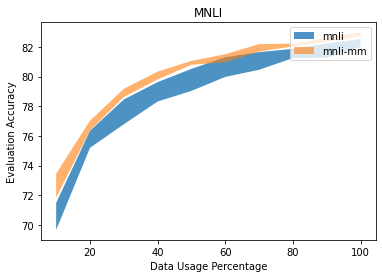

In [9]:
plt.fill_between(data_pct, y1, y2, label='mnli', alpha=0.8)
plt.fill_between(data_pct, y1_mm, y2_mm, label='mnli-mm', alpha=0.6)
plt.xlabel('Data Usage Percentage')
plt.ylabel('Evaluation Accuracy')
plt.title('MNLI')
plt.legend()
plt.savefig('/home/nlp/transformers-importance-sampling/figs/mnli_variable_data_usage.pdf')

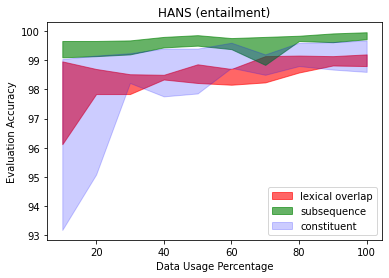

In [10]:
plt.fill_between(data_pct, hans_ent_lo_y1, hans_ent_lo_y2, color = 'red', 
                 label='lexical overlap', alpha=0.6)
plt.fill_between(data_pct, hans_ent_sub_y1, hans_ent_sub_y2, color='green',
                 label='subsequence', alpha=0.6)
plt.fill_between(data_pct, hans_ent_cons_y1, hans_ent_cons_y2, color='blue',
                 label='constituent', alpha=0.2)
plt.xlabel('Data Usage Percentage')
plt.ylabel('Evaluation Accuracy')
plt.title('HANS (entailment)')
plt.legend(loc='lower right')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/hans_seeds_ent.pdf')

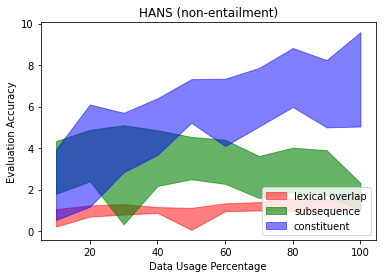

In [11]:
plt.fill_between(data_pct, hans_non_ent_lo_y1, hans_non_ent_lo_y2, color = 'red', 
                 label='lexical overlap', alpha=0.5)
plt.fill_between(data_pct, hans_non_ent_sub_y1, hans_non_ent_sub_y2, color='green',
                 label='subsequence', alpha=0.6)
plt.fill_between(data_pct, hans_non_ent_cons_y1, hans_non_ent_cons_y2, color='blue',
                 label='constituent', alpha=0.5)
plt.xlabel('Data Usage Percentage')
plt.ylabel('Evaluation Accuracy')
plt.title('HANS (non-entailment)')
plt.legend(loc='top left')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/hans_seeds_non_ent.pdf')

## Clustering

### 2 percent : 7520 samples

In [107]:
two_pct_mnli = [32.09, 40.70, 46.03, 47.89, 50.24, 51.91, 53.43, 53.01, 52.8,
               54.87, 56.84, 55.46, 57.25, 58.52, 58.46, 58.85, 58.76, 58.81]
two_pct_mnli_mm = [31.93, 41.6, 46.28, 48.43, 51.23, 52.77, 55.31, 54.60, 54.38,
                  56.34, 58.58, 57.22, 59.21, 60.16, 60.23, 60.49, 60.63, 60.58]

two_pct_hans_ent_lo = np.array([0.0, 16.28, 92.7, 95.98, 94.38, 93.18, 90.4, 92.48, 95.2, 
                       95.16, 87.16, 92.02, 90.92, 93.22, 95.02, 96.86, 96.3, 91.88])
two_pct_hans_ent_sub = np.array([0.0, 18.94, 95.94, 97.78, 97.46, 96.16, 94.04, 95.64, 97.18,
                        97.08, 91.44, 95.4, 94.6, 95.7, 96.64, 98.04, 97.58, 94.78])
two_pct_hans_ent_cons = np.array([0.0, 4.78, 70.66, 69.88, 66, 64.7, 61.74, 74.42, 84.7,
                         85.76, 72.34, 82.02, 81.98, 88.16, 91.12, 93.62, 93.34, 87.9])

two_pct_hans_non_ent_lo = np.array([100.0, 83.02, 4.66, 2.28, 3.34, 5.2, 7.74, 5.84, 3.9, 3.84,
                           11.46, 6.24, 7.58, 5.62, 3.82, 2.48, 2.92, 6.5])
two_pct_hans_non_ent_sub = np.array([100.0, 81.68, 8.14, 5.7, 5.84, 7.36, 10.18, 7.46, 3.86, 4.06,
                            12.76, 7.06, 8.1, 5.26, 3.7, 2.58, 2.92, 6.42])
two_pct_hans_non_ent_cons = np.array([100.0, 95.4, 24.32, 24.7, 26.86, 26.2, 29.08, 17.42, 8.68, 7.82,
                             18.96, 10.24, 10.56, 6.9, 4.8, 3.08, 3.26, 7.28])

two_pct_hans_ent_avg_lo = (two_pct_hans_ent_lo+two_pct_hans_non_ent_lo)/2
two_pct_hans_ent_avg_sub = (two_pct_hans_ent_sub+two_pct_hans_non_ent_sub)/2
two_pct_hans_ent_cons = (two_pct_hans_ent_cons+two_pct_hans_non_ent_cons)/2

# two_pct_epochs = list(range(1, 19))

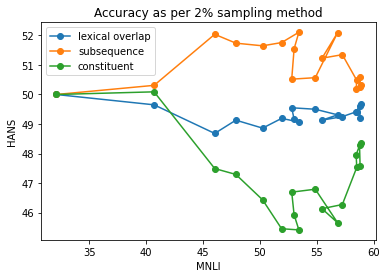

In [110]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(two_pct_mnli, two_pct_hans_ent_avg_lo, label='lexical overlap', marker='o')
plt.plot(two_pct_mnli, two_pct_hans_ent_avg_sub, label='subsequence', marker='o')
plt.plot(two_pct_mnli, two_pct_hans_ent_cons, label='constituent', marker='o')

plt.xlabel('MNLI')
plt.ylabel('HANS')
plt.legend()
plt.title('Accuracy as per 2% sampling method')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/2_pct_mnli_hans_avg.pdf')
plt.show()

### 16 clusters: 19186 samples

In [109]:
sixteen_samples_mnli = [36.64, 53.42, 59.38, 61.80, 61.99, 61.60, 62.38, 62.45, 63.21, 64.54,
                       64.71, 65.36, 64.83, 65.01]
sixteen_samples_mnli_mm = [37.73, 54.92, 61.25, 63.26, 63.85, 63.68, 64.19, 64.73, 65.08, 66.15,
                          67.09, 67.48, 67.01, 67.01]
sixteen_samples_epochs = list(range(1, 15))

In [112]:
sixteen_samples_hans_ent_lo = np.array([0.32, 99.7, 99.86, 99.36, 99.31, 99.2, 99.16,
                                       98.4, 98.28, 98.58, 98.18, 97.9, 97.1, 98.3])
sixteen_samples_hans_ent_sub = np.array([0.3, 99.66, 100.0, 100.0, 100.0, 99.98, 99.98,
                                        99.88, 99.9, 99.94, 99.94, 99.88, 99.5, 99.82])
sixteen_samples_hans_ent_cons = np.array([0.0, 87.1, 97.06, 96.76, 96.38, 97.28, 97.52,
                                         94.48, 94.76, 96.2, 95.12, 94.54, 92.28, 94.74])

sixteen_samples_hans_non_ent_lo = np.array([99.66, 0.14, 0.0, 0.02, 0.06, 0.06, 0.08,
                                           0.26, 0.28, 0.2, 0.24, 0.34, 0.7, 0.36])
sixteen_samples_hans_non_ent_sub = np.array([99.92, 1.88, 0.16, 0.66, 1, 0.84, 0.9,
                                            1.92, 2.02, 1.68, 1.92, 2.1, 3.9, 2.5])
sixteen_samples_hans_non_ent_cons = np.array([99.98, 10.76, 2.24, 1.32, 1.52, 1.26, 1.46,
                                             3.26, 3.28, 2.38, 2.74, 3.18, 5.58, 3.28])

sixteen_samples_hans_avg_lo = (sixteen_samples_hans_ent_lo+sixteen_samples_hans_non_ent_lo)/2
sixteen_samples_hans_avg_sub = (sixteen_samples_hans_ent_sub+sixteen_samples_hans_non_ent_sub)/2
sixteen_samples_hans_avg_cons = (sixteen_samples_hans_ent_cons+sixteen_samples_hans_non_ent_cons)/2

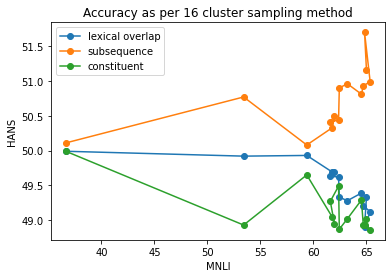

In [114]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sixteen_samples_mnli , sixteen_samples_hans_avg_lo, label='lexical overlap', marker='o')
plt.plot(sixteen_samples_mnli , sixteen_samples_hans_avg_sub, label='subsequence', marker='o')
plt.plot(sixteen_samples_mnli , sixteen_samples_hans_avg_cons, label='constituent', marker='o')


plt.xlabel('MNLI')
plt.ylabel('HANS')
plt.legend()
plt.title('Accuracy as per 16 cluster sampling method')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/16_clusters_mnli_hans_avg.pdf')
plt.show()

### Centroids: 512 samples

In [120]:
centroids_samples_mnli =    [31.93, 32.01, 32.02, 32.05, 32.12, 31.81, 33.66, 37.35, 38.98, 39.64, 40.62,
                          40.48, 41.76, 40.38, 42.19, 40.80]
centroids_samples_mnli_mm = [31.91, 31.92, 31.99, 31.90, 31.92, 31.67, 32.41, 36.86, 38.74, 40.25, 41.18,
                          41.51, 41.94, 40.37, 42.41, 40.88]
centroids_samples_epochs = list(range(1, 17))

In [121]:
centroids_samples_hans_ent_lo = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.36, 36.4, 62.74, 69.52,
                                         77.76, 82.28, 93.2, 71.12, 86.4, 74.7, 84.08, 80.14, 86.9])
centroids_samples_hans_ent_sub = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.52, 32.96, 56.26, 63.26,
                                          70.22, 74.48, 85.8, 65.7, 85.52, 68.82, 84.34, 72.64, 85.82])
centroids_samples_hans_ent_cons = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.6, 29.46, 44.34, 49.08,
                                           58.52, 62.94, 74.02, 48.94, 58.2, 50.98, 53.42, 57.9, 57.64])

centroids_samples_hans_non_ent_lo = np.array([100.0, 100.0, 100.0, 100.0, 100.0, 99.54, 62.64, 35.54, 30.3,
                                             22.44, 17.32, 7.02, 28.98, 10.94, 25.7, 12.28, 20.02, 10.36])
centroids_samples_hans_non_ent_sub = np.array([100.0, 100.0, 100.0, 100.0, 100.0, 97.84, 55.42, 36.06, 29.84,
                                              20.48, 15.22, 8.32, 25.16, 18.72, 23.7, 20.5, 18.76, 17.12])
centroids_samples_hans_non_ent_cons = np.array([100.0, 100.0, 100.0, 100.0, 100.0, 99.38, 74.16, 57.1, 48.52,
                                               36.8, 29.54, 19.12, 43.66, 34.64, 40.44, 39.68, 34.32, 34.42])


centroids_samples_hans_avg_lo = (centroids_samples_hans_ent_lo+centroids_samples_hans_non_ent_lo)/2
centroids_samples_hans_avg_sub = (centroids_samples_hans_ent_sub+centroids_samples_hans_non_ent_sub)/2
centroids_samples_hans_avg_cons = (centroids_samples_hans_ent_cons+centroids_samples_hans_non_ent_cons)/2

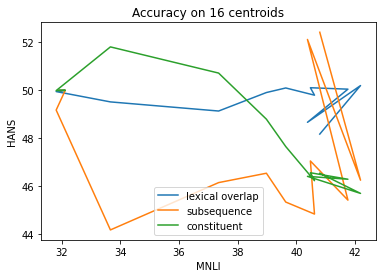

In [124]:
plt.plot(centroids_samples_mnli, centroids_samples_hans_avg_lo[:16], label='lexical overlap', marker='o')
plt.plot(centroids_samples_mnli, centroids_samples_hans_avg_sub[:16], label='subsequence', ma)
plt.plot(centroids_samples_mnli, centroids_samples_hans_avg_cons[:16], label='constituent')


plt.xlabel('MNLI')
plt.ylabel('HANS')
plt.legend()
plt.title('Accuracy on 16 centroids')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/centroids_mnli_hans_avg.pdf')
plt.show()

### Adapters

In [93]:
adapter_bert_base_mnli =    [75.59, 78.09, 78.84, 79.54, 79.92, 80.41]
adapter_bert_base_mnli_mm = [76.47, 78.84, 79.87, 80.53, 81.08, 81.33]
adapter_bert_base_epochs = list(range(1, 7))

In [94]:
adapter_mnli_bert_large =    [68.66, 75.79, 77.65]
adapter_mnli_mm_bert_large = [69.61, 75.9, 77.9]
adapter_large_epochs = list(range(1, 4)) 

In [95]:
adapter_mnli_roberta_large =    [83.81, 87.3, 87.9]
adapter_mnli_mm_roberta_large = [84.25, 87.2, 88.01]
adapter_roberta_large_epochs = list(range(1, 4))

In [96]:
adapter_bert_base_hans_ent_lo = np.array([0, 0, 0])
adapter_bert_base_hans_ent_sub = np.array([0, 0, 0])
adapter_bert_base_hans_ent_cons = np.array([0, 0, 0])

adapter_bert_base_hans_non_ent_lo = np.array([1.0, 1.0, 1.0])
adapter_bert_base_hans_non_ent_sub = np.array([1.0, 1.0, 1.0])
adapter_bert_base_hans_non_ent_cons = np.array([1.0, 1.0, 1.0])

adapter_bert_base_hans_avg_lo = (adapter_bert_base_hans_ent_lo + adapter_bert_base_hans_non_ent_lo)/2
adapter_bert_base_hans_avg_sub = (adapter_bert_base_hans_ent_sub+adapter_bert_base_hans_non_ent_sub)/2
adapter_bert_base_hans_avg_cons = (adapter_bert_base_hans_ent_cons+adapter_bert_base_hans_non_ent_cons)/2

In [97]:
adapter_bert_large_hans_ent_lo = np.array([99.42, 99.92, 99.99])
adapter_bert_large_hans_ent_sub = np.array([1.0, 99.9, 99.98])
adapter_bert_large_hans_ent_cons = np.array([97.54, 99.28, 99.46])

adapter_bert_large_hans_non_ent_lo = np.array([0.02, 0.02, 0.04])
adapter_bert_large_hans_non_ent_sub = np.array([0.22, 0.28, 0.26])
adapter_bert_large_hans_non_ent_cons = np.array([1.6, 0.94, 1.44])

adapter_bert_large_hans_avg_lo = (adapter_bert_large_hans_ent_lo + adapter_bert_large_hans_non_ent_lo)/2
adapter_bert_large_hans_avg_sub = (adapter_bert_large_hans_ent_sub+adapter_bert_large_hans_non_ent_sub)/2
adapter_bert_large_hans_avg_cons = (adapter_bert_large_hans_ent_cons+adapter_bert_large_hans_non_ent_cons)/2

In [98]:
adapter_roberta_large_hans_ent_lo = np.array([0.0, 0.02, 0.02])
adapter_roberta_large_hans_ent_sub = np.array([0.0, 0.0, 0.0])
adapter_roberta_large_hans_ent_cons = np.array([0.0, 0.0, 0.0])

adapter_roberta_large_hans_non_ent_lo = np.array([100, 98.14, 99.82])
adapter_roberta_large_hans_non_ent_sub = np.array([100, 99.96, 99.96])
adapter_roberta_large_hans_non_ent_cons = np.array([100, 99.02, 99.42])

adapter_roberta_large_hans_avg_lo = (adapter_roberta_large_hans_ent_lo+adapter_roberta_large_hans_non_ent_lo)/2

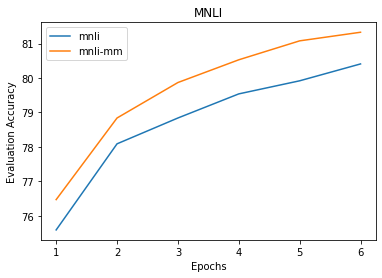

In [77]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(adapter_bert_base_epochs, adapter_bert_base_mnli, label='mnli')
plt.plot(adapter_bert_base_epochs, adapter_bert_base_mnli_mm, label='mnli-mm')


plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('MNLI')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/adapter_mnli.pdf')
plt.show()

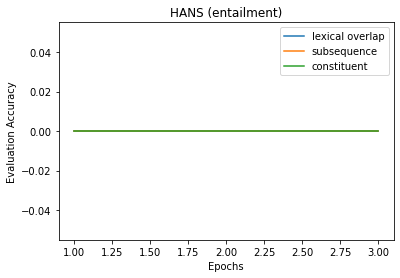

In [80]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(adapter_bert_base_epochs[:3], adapter_bert_base_hans_ent_lo, label='lexical overlap')
plt.plot(adapter_bert_base_epochs[:3], adapter_bert_base_hans_ent_sub, label='subsequence')
plt.plot(adapter_bert_base_epochs[:3], adapter_bert_base_hans_ent_cons, label='constituent')


plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/adapter_hans_ent.pdf')
plt.show()

In [ ]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(adapter_epochs, adapter_hans_non_ent_lo, label='lexical overlap')
plt.plot(adapter_epochs, adapter_hans_non_ent_sub, label='subsequence')
plt.plot(adapter_epochs, adapter_hans_non_ent_cons, label='constituent')


plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (non-entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/adapter_hans_non_ent.pdf')
plt.show()

## HEX

In [99]:
# bert-base

hex_mnli =    [54.48, 54.74, 56.25, 55.08, 54.75, 54.17, 53.67, 54.62, 54.38, 53.66, 53.59]
hex_mnli_mm = [55.00, 55.50, 57.12, 55.00, 55.04, 54.49, 53.94, 54.98, 54.79, 53.73, 53.72]
hex_epochs = list(range(1, 12))

In [100]:
hex_hans_ent_lo = np.array([100, 99.32, 96.58, 98.34, 98.24, 98.32, 98.04, 98, 98.04, 98.2, 98.26])
hex_hans_ent_sub = np.array([100, 99.86, 98.36, 99.66, 99.58, 99.56, 99.56, 99.56, 99.56, 99.6, 99.62])
hex_hans_ent_cons = np.array([99.66, 97.94, 91.14, 97.56, 97.74, 97.94, 97, 96.92, 97.12, 97.34, 97.56])

hex_hans_non_ent_lo = np.array([0.02, 0.32, 1.72, 0.82, 1.04, 1.04, 1.22, 1.18, 1.2, 1.08, 1.02])
hex_hans_non_ent_sub = np.array([0.06, 0.84, 7.32, 2.82, 3.02, 2.98, 3.7, 3.94, 3.48, 3.14, 3.02])
hex_hans_non_ent_cons = np.array([0.2, 2.24, 19.38, 5.16, 4.06, 4.18, 5.24, 5.54, 5.04, 4.4, 4.04])

hex_hans_avg_lo = (hex_hans_ent_lo + hex_hans_non_ent_lo)/2
hex_hans_avg_sub = (hex_hans_ent_sub + hex_hans_non_ent_sub)/2
hex_hans_avg_cons = (hex_hans_ent_cons + hex_hans_non_ent_cons)/2

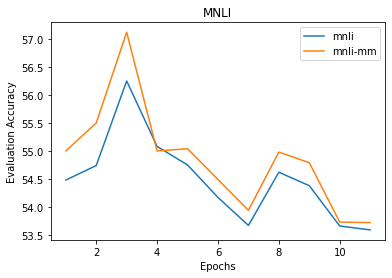

In [101]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hex_epochs, hex_mnli, label='mnli')
plt.plot(hex_epochs, hex_mnli_mm, label='mnli-mm')


plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('MNLI')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/hex_mnli.pdf')
plt.show()

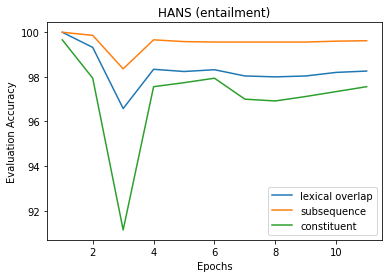

In [18]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hex_epochs, hex_hans_ent_lo, label='lexical overlap')
plt.plot(hex_epochs, hex_hans_ent_sub, label='subsequence')
plt.plot(hex_epochs, hex_hans_ent_cons, label='constituent')


plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/hex_hans_ent.pdf')
plt.show()

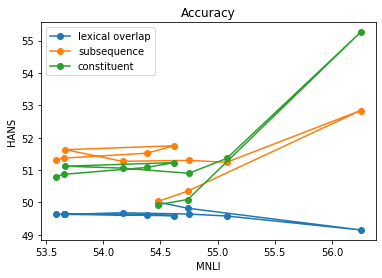

In [19]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hex_mnli, hex_hans_avg_lo, label='lexical overlap', marker='o')
plt.plot(hex_mnli, hex_hans_avg_sub, label='subsequence', marker='o')
plt.plot(hex_mnli, hex_hans_avg_cons, label='constituent', marker='o')


plt.xlabel('MNLI')
plt.ylabel('HANS')
plt.legend()
plt.title('Accuracy')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/hex_mnli_hans_avg.pdf')
plt.show()

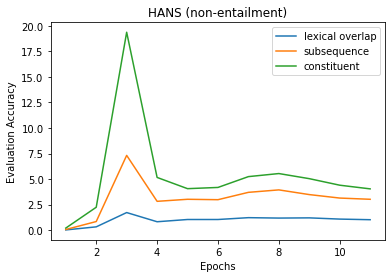

In [20]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hex_epochs, hex_hans_non_ent_lo, label='lexical overlap')
plt.plot(hex_epochs, hex_hans_non_ent_sub, label='subsequence')
plt.plot(hex_epochs, hex_hans_non_ent_cons, label='constituent')


plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (non-entailment)')
# plt.savefig('/home/nlp/transformers-importance-sampling/figs/hex_hans_non_ent.pdf')
plt.show()

## Meta Learning

In [14]:
# 1 Bert-base, outer and inner, 2e-5, 2e-5
bert_base_maml_1_mnli = [31.91, 31.8, 31.9, 31.9, 32.7, 32.7, 32.7, 32.7, 46.9, 49.5, 54.5]
bert_base_maml_1_hans_ent_lo = 97.2
bert_base_maml_1_hans_ent_sub = 99.38
bert_base_maml_1_hans_ent_cons = 92.36

bert_base_maml_1_hans_non_ent_lo = 1.76
bert_base_maml_1_hans_non_ent_sub = 5.12
bert_base_maml_1_hans_non_ent_cons = 2.08

In [15]:
# 2 Bert-base, outer and inner, 2e-5, 2e-4
bert_base_maml_2_mnli = [31.91, 31.8, 31.8, 31.6, 35.6, 32.6, 32.6, 32.7, 32.7, 32.7, 32.7]

bert_base_maml_2_hans_ent_lo = 0
bert_base_maml_2_hans_ent_sub = 0
bert_base_maml_2_hans_ent_cons = 0

bert_base_maml_2_hans_non_ent_lo = 100
bert_base_maml_2_hans_non_ent_sub = 100
bert_base_maml_2_hans_non_ent_cons = 100

In [16]:
# 3 Bert-base, outer and inner, 2e-5, 2e-3
bert_base_maml_3_mnli = [31.9, 31.86, 31.84, 31.81, 32.5, 32.7, 32.73, 32.73, 32.73, 32.73]

bert_base_maml_3_hans_ent_lo = 0
bert_base_maml_3_hans_ent_sub = 0
bert_base_maml_3_hans_ent_cons = 0

bert_base_maml_3_hans_non_ent_lo = 100
bert_base_maml_3_hans_non_ent_sub = 100
bert_base_maml_3_hans_non_ent_cons = 100

In [17]:
# 4 Bert-base, outer and inner, 2e-5, 2e-2
bert_base_maml_4_mnli = [31.9, 31.9, 31.84, 31.9, 32.9, 32.7, 32.7, 32.7, 32.7, 32.7, 32.7]

bert_base_maml_4_hans_ent_lo = 0
bert_base_maml_4_hans_ent_sub = 0
bert_base_maml_4_hans_ent_cons = 0

bert_base_maml_4_hans_non_ent_lo = 100
bert_base_maml_4_hans_non_ent_sub = 100
bert_base_maml_4_hans_non_ent_cons = 100

In [18]:
# 5 Bert-base, outer and inner, 2e-5, 2e-1
bert_base_maml_5_mnli = [31.86, 31.83, 31.81, 31.8, 31.92, 32.6, 32.71, 32.7, 32.7, 32.7, 32.7, 32.7]

bert_base_maml_4_hans_ent_lo = 0
bert_base_maml_4_hans_ent_sub = 0
bert_base_maml_4_hans_ent_cons = 0

bert_base_maml_4_hans_non_ent_lo = 100
bert_base_maml_4_hans_non_ent_sub = 100
bert_base_maml_4_hans_non_ent_cons = 100

In [19]:
# 6 Bert-large, outer and inner, 2e-5
bert_large_maml_6_mnli = [32.11, 32.19, 32.27, 32.51, 32.44, 32.56, 32.62, 32.54, 53.2, 57.69, 59.7, 68.82]

bert_large_maml_6_hans_ent_lo = 99.08
bert_large_maml_6_hans_ent_sub = 100
bert_large_maml_6_hans_ent_cons = 97.9

bert_large_maml_6_hans_non_ent_lo = 0
bert_large_maml_6_hans_non_ent_sub = 0.76
bert_large_maml_6_hans_non_ent_cons = 0.32

In [21]:
# 7 Bert-large, outer 2e-5, and inner, 2e-3
bert_large_maml_7_mnli = [32.12, 32.25, 32.33, 32.6, 32.68, 32.73, 32.73, 32.73, 32.73, 32.78, 32.73]

bert_large_maml_7_hans_ent_lo = 0
bert_large_maml_7_hans_ent_sub = 0
bert_large_maml_7_hans_ent_cons = 0

bert_large_maml_7_hans_non_ent_lo = 100
bert_large_maml_7_hans_non_ent_sub = 100
bert_large_maml_7_hans_non_ent_cons = 100

In [66]:
for i in  range(len(sample_sizes)):
    print(i, 2**(i+1), bert_large_maml_seed_default_hans_non_ent_lo[i], bert_large_maml_seed_1_hans_non_ent_lo[i], bert_large_maml_seed_2_hans_non_ent_lo[i])

0 2 100 100 100
1 4 100 100 100
2 8 100 100 100
3 16 100 100 100
4 32 100 100 100
5 64 100 100 100
6 128 100 100 100
7 256 0.22 99.96 100
8 512 0 0.26 0
9 1024 1.68 0.34 0
10 2048 0.26 0.02 0.12


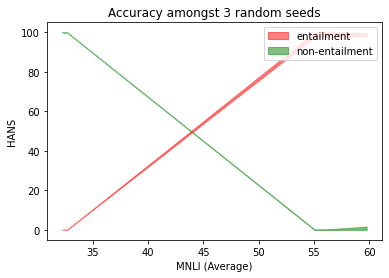

In [70]:
## Different seeds
bert_large_maml_mnli_seed_default = [32.11, 32.19, 32.27, 32.51, 32.44, 32.56, 32.62, 32.54, 53.2, 57.69, 59.7]
bert_large_maml_seed_default_hans_ent_lo = [0, 0, 0, 0, 0, 0, 0, 0, 98.06, 99.66, 98.14, 98.1]
bert_large_maml_seed_default_hans_ent_sub = [0, 0, 0, 0, 0, 0, 0, 0, 99.82, 99.98, 99.96, 99.92]
bert_large_maml_seed_default_hans_ent_cons = [0, 0, 0, 0, 0, 0, 0, 0, 91.92, 98.28, 95.1, 97.6]

bert_large_maml_seed_default_hans_non_ent_lo = [100, 100, 100, 100, 100, 100, 100, 100, 0.22, 0, 1.68]
bert_large_maml_seed_default_hans_non_ent_sub = [100, 100, 100, 100, 100, 100, 100, 100, 4.24, 0.44, 3.82]
bert_large_maml_seed_default_hans_non_ent_cons = [100, 100, 100, 100, 100, 100, 100, 100, 4.52, 1.62, 3.42]


bert_large_maml_mnli_seed_1 = [32.28, 32.42, 32.45, 32.42, 32.3, 32.47, 32.6, 32.69, 55.97, 55.64, 59.8]
bert_large_maml_seed_1_hans_ent_lo =       [0, 0, 0, 0, 0, 0, 0, 0, 97.62, 97.78, 99.44]
bert_large_maml_seed_1_hans_ent_sub =      [0, 0, 0, 0, 0, 0, 0, 0, 99.88, 99.92, 100]
bert_large_maml_seed_1_hans_ent_cons =     [0, 0, 0, 0, 0, 0, 0, 0, 92.64, 93.32, 99.24]

bert_large_maml_seed_1_hans_non_ent_lo =   [100, 100, 100, 100, 100, 100, 100, 99.96, 0.26, 0.34, 0.02]
bert_large_maml_seed_1_hans_non_ent_sub =  [100, 100, 100, 100, 100, 100, 100, 100, 4.4, 4.94, 0.58]
bert_large_maml_seed_1_hans_non_ent_cons = [100, 100, 100, 100, 100, 100, 100, 100, 6.34, 6.74, 1.04]


bert_large_maml_mnli_seed_2 = [31.97, 31.97, 31.96, 31.97, 32.77, 32.61, 32.62, 32.73, 51.86, 56.42, 60.17]
bert_large_maml_seed_2_hans_ent_lo =       [0, 0, 0, 0, 0, 0, 0, 0, 99.74, 100, 99.34]
bert_large_maml_seed_2_hans_ent_sub =      [0, 0, 0, 0, 0, 0, 0, 0, 99.86, 100, 100]
bert_large_maml_seed_2_hans_ent_cons =     [0, 0, 0, 0, 0, 0, 0, 0, 98.62, 100, 98.8]

bert_large_maml_seed_2_hans_non_ent_lo =   [100, 100, 100, 100, 100, 100, 100, 100, 0, 0, 0.12]
bert_large_maml_seed_2_hans_non_ent_sub =  [100, 100, 100, 100, 100, 100, 100, 100, 0.28, 0, 0.94]
bert_large_maml_seed_2_hans_non_ent_cons = [100, 100, 100, 100, 100, 100, 100, 100, 1.6, 0, 0.26]

sample_sizes = [2,4,8,16,32,64,128,256,512,1024,2048]


bert_large_mnli_seed_avg = []

bert_large_maml_hans_seed_max_ent_lo = []
bert_large_maml_hans_seed_min_ent_lo = []
bert_large_maml_hans_seed_max_non_ent_lo = []
bert_large_maml_hans_seed_min_non_ent_lo = []

for i in range(len(sample_sizes)):
    
    bert_large_mnli_seed_avg.append((bert_large_maml_mnli_seed_default[i]+
                                   bert_large_maml_mnli_seed_1[i]+
                                   bert_large_maml_mnli_seed_1[i])/3)
    
    bert_large_maml_hans_seed_max_ent_lo.append(max(bert_large_maml_seed_default_hans_ent_lo[i],
                                      bert_large_maml_seed_1_hans_ent_lo[i],
                                      bert_large_maml_seed_2_hans_ent_lo[i]))
    
    bert_large_maml_hans_seed_min_ent_lo.append(min(bert_large_maml_seed_default_hans_ent_lo[i],
                                      bert_large_maml_seed_1_hans_ent_lo[i],
                                      bert_large_maml_seed_2_hans_ent_lo[i]))
    
    bert_large_maml_hans_seed_max_non_ent_lo.append(max(bert_large_maml_seed_default_hans_non_ent_lo[i],
                                      bert_large_maml_seed_1_hans_non_ent_lo[i],
                                      bert_large_maml_seed_2_hans_non_ent_lo[i]))
    
    bert_large_maml_hans_seed_min_non_ent_lo.append(min(bert_large_maml_seed_default_hans_non_ent_lo[i],
                                      bert_large_maml_seed_1_hans_non_ent_lo[i],
                                      bert_large_maml_seed_2_hans_non_ent_lo[i]))

plt.fill_between(bert_large_mnli_seed_avg, bert_large_maml_hans_seed_min_ent_lo, 
                bert_large_maml_hans_seed_max_ent_lo, color = 'red', 
                 label='entailment', alpha=0.5)

plt.fill_between(bert_large_mnli_seed_avg, bert_large_maml_hans_seed_min_non_ent_lo, 
                 bert_large_maml_hans_seed_max_non_ent_lo, color = 'green', 
                  label='non-entailment', alpha=0.5)

plt.xlabel('MNLI (Average)')
plt.ylabel('HANS')
plt.title('Accuracy amongst 3 random seeds')
plt.legend()
plt.savefig('/home/nlp/transformers-importance-sampling/figs/maml_bert_large_seeds.pdf')

## Siamese 2

In [ ]:
siamese_bert_base_mnli = [58.46, 59.78, 60.02, 59.69, 59.08]
siamese_bert_base_mnli_mm = [59.26, 60.30, 60.32, 59.95, 59.60]

siamese_hans_bert_base_ent_lo = np.array([65.36, 64.1, 60.82, 60.32, 59.86])
siamese_hans_bert_base_ent_sub = np.array([73.62, 74.8, 70.68, 69.38, 68.22])
siamese_hans_bert_base_ent_cons = np.array([70.3, 72.18, 68.06, 65.56, 65.16])

siamese_hans_bert_base_non_ent_lo = np.array([36.8, 37.52, 39.76, 38.3, 37.92])
siamese_hans_bert_base_non_ent_sub = np.array([35.96, 34.34, 34.18, 32.5, 32.62])
siamese_hans_bert_base_non_ent_cons = np.array([32.38, 34.96, 41.14, 43.72, 43.82])


siamese_hans_bert_base_avg_lo = (siamese_hans_bert_base_ent_lo + siamese_hans_bert_base_non_ent_lo)/2
siamese_hans_bert_base_avg_sub = (siamese_hans_bert_base_ent_sub + siamese_hans_bert_base_non_ent_sub)/2
siamese_hans_bert_base_avg_cons = (siamese_hans_bert_base_ent_cons + siamese_hans_bert_base_non_ent_cons)/2

x = [1, 2, 3, 4, 5]

In [ ]:
plt.plot(x, siamese_hans_bert_base_avg_lo, label='Lexical overlap')
plt.plot(x, siamese_hans_bert_base_avg_sub, label='subsequence')
plt.plot(x, siamese_hans_bert_base_avg_cons, label='constituent')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (average)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/siamese_hans_bert_base_avg.pdf')
plt.show()

In [27]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(siamese_x, siamese_mnli, label='mnli')
plt.plot(siamese_x, siamese_mnli_mm, label='mnli-mm')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('MNLI')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/siamese_mnli.pdf')
plt.show()

NameError: name 'siamese_x' is not defined

In [28]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(siamese_x, siamese_hans_lo_ent, label='Lexical overlap')
plt.plot(siamese_x, siamese_hans_sub_ent, label='subsequence')
plt.plot(siamese_x, siamese_hans_cons_ent, label='constituent')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/siamese_hans_ent.pdf')
plt.show()

NameError: name 'siamese_x' is not defined

In [29]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(siamese_x, siamese_hans_lo_non_ent, label='Lexical overlap')
plt.plot(siamese_x, siamese_hans_sub_non_ent, label='subsequence')
plt.plot(siamese_x, siamese_hans_cons_non_ent, label='constituent')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (non-entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/siamese_hans_non_ent.pdf')
plt.show()

NameError: name 'siamese_x' is not defined

## Siamese (bert_large)

In [102]:
siamese_bert_large_mnli = [61.55, 61.94, 60.78, 58.88, 57.11, 56.92, 56.97, 56.78]
siamese_bert_large_mnli_mm = [62.04, 62.25, 60.21, 58.64, 57.75, 56.39, 56.12, 56.24]
x = [1, 2, 3, 4, 5, 6, 7, 8]

In [103]:
siamese_bert_large_hans_ent_lo = np.array([68.82, 64.98, 62.44, 55.72, 48.64, 48.36, 45.48, 39.92])
siamese_bert_large_hans_ent_sub = np.array([77.72, 74.84, 70.96, 65.7, 60.36, 59.5, 56.02, 50.48])
siamese_bert_large_hans_ent_cons = np.array([76.62, 71.22, 67.9, 63.3, 60.14, 59.06, 57.16, 51.02])

siamese_bert_large_hans_non_ent_lo = np.array([31.4, 35.44, 39.68, 45.56, 53.72, 53.56, 55.16, 62.26])
siamese_bert_large_hans_non_ent_sub = np.array([27.32, 30.44, 35.2, 41.3, 45.8, 44.76, 47.06, 49.84])
siamese_bert_large_hans_non_ent_cons = np.array([28.04, 35.76, 40.98, 46.18, 50.52, 53.66, 54.52, 62.16])

siamese_bert_large_hans_avg_lo = (siamese_bert_large_hans_ent_lo + siamese_bert_large_hans_non_ent_lo)/2
siamese_bert_large_hans_avg_sub = (siamese_bert_large_hans_ent_sub + siamese_bert_large_hans_non_ent_sub)/2
siamese_bert_large_hans_avg_cons = (siamese_bert_large_hans_ent_cons + siamese_bert_large_hans_non_ent_cons)/2

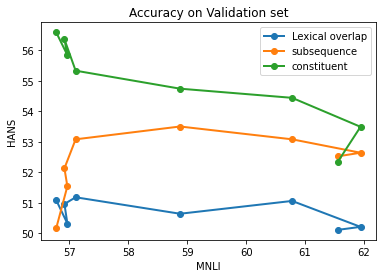

In [104]:
plt.plot(siamese_bert_large_mnli, siamese_bert_large_hans_avg_lo, marker='o', 
         linewidth=2, markersize=6, label='Lexical overlap')
plt.plot(siamese_bert_large_mnli, siamese_bert_large_hans_avg_sub, marker='o',
         linewidth=2, markersize=6, label='subsequence')
plt.plot(siamese_bert_large_mnli, siamese_bert_large_hans_avg_cons, marker='o',
         linewidth=2, markersize=6, label='constituent')

plt.xlabel('MNLI')
plt.ylabel('HANS')
plt.legend()
plt.title('Accuracy on Validation set')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/siamese_mnli_hans_bert_base_avg.pdf')
plt.show()

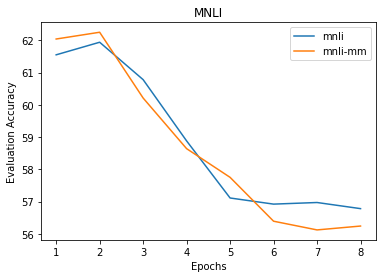

In [33]:
plt.plot(x, siamese_bert_large_mnli, label='mnli')
plt.plot(x, siamese_bert_large_mnli_mm, label='mnli-mm')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('MNLI')
# plt.savefig('/home/nlp/transformers-importance-sampling/figs/siamese_hans_bert_large_avg.pdf')
plt.show()

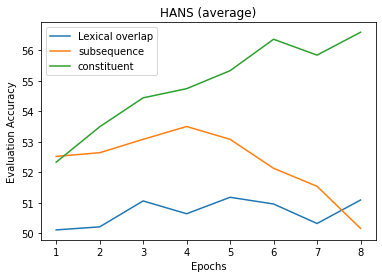

In [34]:
plt.plot(x, siamese_bert_large_hans_avg_lo, label='Lexical overlap')
plt.plot(x, siamese_bert_large_hans_avg_sub, label='subsequence')
plt.plot(x, siamese_bert_large_hans_avg_cons, label='constituent')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (average)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/siamese_hans_bert_large_avg.pdf')
plt.show()

## Siamese (add)

In [35]:
siamese_add_mnli = [31.788, 57.36, 58.42, 58.27, 57.67]
siamese_add_mnli_mm = [32.78, 57.54, 58.49, 58.34, 57.8]

siamese_add_hans_lo_ent = np.array([0.00, 63.36, 62.48, 58.34, 56.9])
siamese_add_hans_sub_ent = np.array([0.00, 72.42, 70.76, 67.52, 66.1])
siamese_add_hans_cons_ent = np.array([0.00, 68.92, 69.14, 66.46, 64.2])

siamese_add_hans_lo_non_ent = np.array([99.96, 37.3, 37.58, 41.5, 42.84])
siamese_add_hans_sub_non_ent = np.array([99.92, 38.74, 38.96, 40.4, 40.4])
siamese_add_hans_cons_non_ent = np.array([99.88, 31.24, 30.9, 33.3, 34.88])


siamese_add_hans_lo_avg = (siamese_add_hans_lo_ent + siamese_add_hans_lo_non_ent)/2
siamese_add_hans_sub_avg = (siamese_add_hans_sub_ent + siamese_add_hans_sub_non_ent)/2
siamese_add_hans_cons_avg = (siamese_add_hans_cons_ent + siamese_add_hans_cons_non_ent)/2

siamese_add_x = [0, 1, 2, 3, 4]

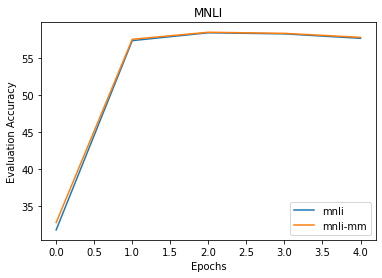

In [36]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(siamese_add_x, siamese_add_mnli, label='mnli')
plt.plot(siamese_add_x, siamese_add_mnli_mm, label='mnli-mm')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('MNLI')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/siamese_add_mnli.pdf')
plt.show()

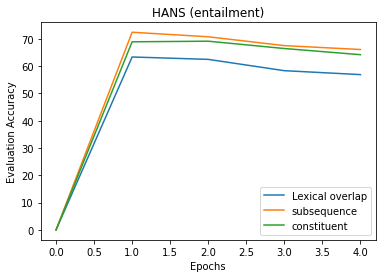

In [37]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(siamese_add_x, siamese_add_hans_lo_ent, label='Lexical overlap')
plt.plot(siamese_add_x, siamese_add_hans_sub_ent, label='subsequence')
plt.plot(siamese_add_x, siamese_add_hans_cons_ent, label='constituent')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/siamese_add_hans_ent.pdf')
plt.show()

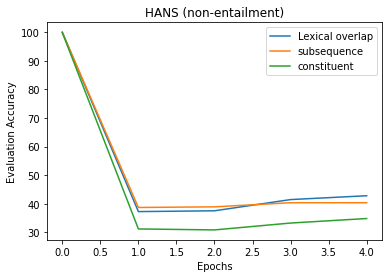

In [38]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(siamese_add_x, siamese_add_hans_lo_non_ent, label='Lexical overlap')
plt.plot(siamese_add_x, siamese_add_hans_sub_non_ent, label='subsequence')
plt.plot(siamese_add_x, siamese_add_hans_cons_non_ent, label='constituent')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (non-entailment)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/siamese_add_hans_non_ent.pdf')
plt.show()

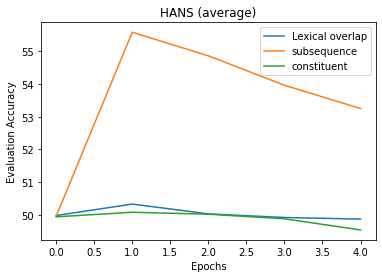

In [40]:
# plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(siamese_add_x, siamese_add_hans_lo_avg, label='Lexical overlap')
plt.plot(siamese_add_x, siamese_add_hans_sub_avg, label='subsequence')
plt.plot(siamese_add_x, siamese_add_hans_cons_avg, label='constituent')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS (average)')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/siamese_add_hans_avg.pdf')
plt.show()

## Big-small

In [71]:
bert_tiny_mnli = [47.4, 54.9, 58.3, 60]
bert_tiny_mnli_mm = [47.1, 55.9, 60.3, 61.6]

bert_tiny_hans_ent_lo = np.array([100, 100, 100, 100])
bert_tiny_hans_ent_sub = np.array([100, 100, 100, 100])
bert_tiny_hans_ent_cons = np.array([100, 100, 100, 100])

bert_tiny_hans_non_ent_lo = np.array([0, 0, 0, 0])
bert_tiny_hans_non_ent_sub = np.array([0, 0, 0, 0])
bert_tiny_hans_non_ent_cons = np.array([0, 0, 0, 0])

bert_tiny_hans_avg_lo = (bert_tiny_hans_ent_lo+bert_tiny_hans_non_ent_lo)/2
bert_tiny_hans_avg_sub = (bert_tiny_hans_ent_sub+bert_tiny_hans_non_ent_sub)/2
bert_tiny_hans_avg_cons = (bert_tiny_hans_ent_cons+bert_tiny_hans_non_ent_cons)/2

In [72]:
bert_mini_mnli = [62.1, 64.9, 66.8, 68.0]
bert_mini_mnli_mm = [64.3, 66.6, 68.0, 69.2]

bert_mini_hans_ent_lo = np.array([100, 100, 100, 100])
bert_mini_hans_ent_sub = np.array([100, 100, 100, 100])
bert_mini_hans_ent_cons = np.array([100, 100, 100, 100])

bert_mini_hans_non_ent_lo = np.array([0, 0, 0, 0])
bert_mini_hans_non_ent_sub = np.array([0, 0, 0, 0])
bert_mini_hans_non_ent_cons = np.array([0, 0, 0, 0.02])

bert_mini_hans_avg_lo = (bert_mini_hans_ent_lo + bert_mini_hans_non_ent_lo)/2
bert_mini_hans_avg_sub = (bert_mini_hans_ent_sub + bert_mini_hans_non_ent_sub)/2
bert_mini_hans_avg_cons = (bert_mini_hans_ent_cons + bert_mini_hans_non_ent_cons)/2

In [73]:
bert_small_mnli = [67.2, 70.2, 71.48, 72.15]
bert_small_mnli_mm = [68.99, 71.44, 72.8, 73.7]

bert_small_hans_ent_lo = np.array([100, 99.36, 97.8, 96.84])
bert_small_hans_ent_sub = np.array([100, 99.78, 98.78, 97.5])
bert_small_hans_ent_cons = np.array([99.96, 98.04, 97, 97.1])

bert_small_hans_non_ent_lo = np.array([0, 0.28, 1.06, 1.94])
bert_small_hans_non_ent_sub = np.array([0, 1.96, 5.34, 6.6])
bert_small_hans_non_ent_cons = np.array([0, 2.44, 4, 4.38])

bert_small_hans_avg_lo = (bert_small_hans_ent_lo+bert_small_hans_non_ent_lo)/2
bert_small_hans_avg_sub = (bert_small_hans_ent_sub + bert_small_hans_non_ent_sub)/2
bert_small_hans_avg_cons = (bert_small_hans_ent_cons+bert_small_hans_non_ent_cons)/2

In [74]:
bert_medium_mnli = [71.3, 74.3, 75.35, 75.86]
bert_medium_mnli_mm = [72.5, 75.9, 76.77, 77.0]

bert_medium_hans_ent_lo = np.array([99.82, 98.16, 98.28, 98.48])
bert_medium_hans_ent_sub = np.array([100, 99.96, 99.82, 99.7])
bert_medium_hans_ent_cons = np.array([99.3, 98.6, 99.06, 99.22])

bert_medium_hans_non_ent_lo = np.array([0, 0.86, 1.02, 1.0])
bert_medium_hans_non_ent_sub = np.array([1.42, 4.24, 4, 3.8])
bert_medium_hans_non_ent_cons = np.array([0.54, 1.66, 2.16, 2.46])

bert_medium_hans_avg_lo = (bert_medium_hans_ent_lo+bert_medium_hans_non_ent_lo)/2
bert_medium_hans_avg_sub = (bert_medium_hans_ent_sub+bert_medium_hans_non_ent_sub)/2
bert_medium_hans_avg_cons = (bert_medium_hans_ent_cons+bert_medium_hans_non_ent_cons)/2

In [75]:
bert_base_mnli = [81, 81.9, 82, 82.7]
bert_base_mnli_mm = [81.6, 82.4, 82.5, 83.2]

bert_base_ent_lo = np.array([98.56, 99.04, 99.02, 99.4])
bert_base_ent_sub = np.array([99.8, 99.7, 99.8, 99.94])
bert_base_ent_cons = np.array([99.6, 99.6, 99.48, 99.58])

bert_base_non_ent_lo = np.array([1.2, 1.32, 1.58, 1.56])
bert_base_non_ent_sub = np.array([2.76, 2.36, 2.32, 1.32])
bert_base_non_ent_cons = np.array([3.82, 5.42, 6.88, 6.88])

bert_base_hans_avg_lo = (bert_base_ent_lo+bert_base_non_ent_lo)/2
bert_base_hans_avg_sub = (bert_base_ent_sub+bert_base_non_ent_sub)/2
bert_base_hans_avg_cons = (bert_base_ent_cons+bert_base_non_ent_cons)/2

In [76]:
bert_large_mnli = [84.5, 85.6, 86, 85.7]
bert_large_mnli_mm = [84.6, 85.5, 85.5, 85.2]

bert_large_ent_lo = np.array([99.46, 97.12, 94.6, 90.82])
bert_large_ent_sub = np.array([99.98, 99.02, 96.94, 94.56])
bert_large_ent_cons = np.array([96.18, 96.28, 94.74, 93.6])

bert_large_non_ent_lo = np.array([3.92, 21.7, 47.56, 62.5])
bert_large_non_ent_sub = np.array([4, 9.78, 28.18, 33.3])
bert_large_non_ent_cons = np.array([17.2, 21.16, 34.68, 36.22])

bert_large_hans_avg_lo = (bert_large_ent_lo +bert_large_non_ent_lo )/2
bert_large_hans_avg_sub = (bert_large_ent_sub+bert_large_non_ent_sub)/2
bert_large_hans_avg_cons = (bert_large_ent_cons+bert_large_non_ent_cons)/2

In [77]:
albert_base_mnli = [82.6, 84.6, 84.8, 84.8]
albert_base_mnli_mm = [82.9, 84.89, 85.32, 84.95]

albert_base_ent_lo = np.array([100, 99.92, 99.86, 99.6])
albert_base_ent_sub = np.array([100, 99.98, 99.98, 99.96])
albert_base_ent_cons = np.array([100, 100, 100.00, 100])

albert_base_non_ent_lo = np.array([0.12, 11.6, 27.24, 35.74])
albert_base_non_ent_sub = np.array([0, 1.08, 4.88, 7.62])
albert_base_non_ent_cons = np.array([2.2, 0.42, 3.96, 3.82])

albert_base_hans_avg_lo = (albert_base_ent_lo+albert_base_non_ent_lo)/2
albert_base_hans_avg_sub = (albert_base_ent_sub+albert_base_non_ent_sub)/2
albert_base_hans_avg_cons = (albert_base_ent_cons+albert_base_non_ent_cons)/2

In [78]:
albert_large_mnli = [86.3, 87.3, 87.3, 87]
albert_large_mnli_mm = [86.7, 87.3, 87.3, 87.2]

albert_large_ent_lo = np.array([100, 99.96, 99.98, 99.96])
albert_large_ent_sub = np.array([100, 100, 100.0, 100])
albert_large_ent_cons = np.array([100, 100, 100, 100])

albert_large_non_ent_lo = np.array([26.44, 57.6, 61.68, 69.88])
albert_large_non_ent_sub = np.array([15.78, 23.72, 19.8, 19.14])
albert_large_non_ent_cons = np.array([1.94, 4.06, 3.94, 3.14])

albert_large_hans_avg_lo = (albert_large_ent_lo+albert_large_non_ent_lo)/2
albert_large_hans_avg_sub = (albert_large_ent_sub+albert_large_non_ent_sub)/2
albert_large_hans_avg_cons = (albert_large_ent_cons+albert_large_non_ent_cons)/2

In [79]:
roberta_base_mnli = [84.7, 86.0, 86.32, 87]
roberta_base_mnli_mm = [85.0, 86, 86.43, 87]


roberta_base_ent_lo = np.array([0.02, 0.0, 0.02, 0.02])
roberta_base_ent_sub = np.array([0.0, 0.0, 0.0, 0.0])
roberta_base_ent_cons = np.array([0.0, 0.0, 0.0, 0.0])

roberta_base_non_ent_lo = np.array([99.86, 99.96, 99.68, 99.9])
roberta_base_non_ent_sub = np.array([99.48, 99.66, 99.58, 99.64])
roberta_base_non_ent_cons = np.array([96.84, 96.52, 92.98, 93.98])

roberta_base_hans_avg_lo = (roberta_base_ent_lo+roberta_base_non_ent_lo)/2
roberta_base_hans_avg_sub = (roberta_base_ent_sub+roberta_base_non_ent_sub)/2
roberta_base_hans_avg_cons = (roberta_base_ent_cons+roberta_base_non_ent_cons)/2

In [80]:
roberta_large_mnli = [90, 90.5, 90.15, 90.2]
roberta_large_mnli_mm = [90, 90.4, 90.02, 90.12]

roberta_large_ent_lo = np.array([0.0, 0.0, 0.0, 0.0])
roberta_large_ent_sub = np.array([0.0, 0.0, 0.0, 0.0])
roberta_large_ent_cons = np.array([0.0, 0.0, 0.0, 0.0])

roberta_large_non_ent_lo = np.array([99.72, 99.56, 98.7, 98.8])
roberta_large_non_ent_sub = np.array([99.44, 99.32, 98.6, 98.48])
roberta_large_non_ent_cons = np.array([88.48, 84.18, 82.76, 80.28])

roberta_large_hans_avg_lo = (roberta_large_ent_lo+roberta_large_non_ent_lo)/2
roberta_large_hans_avg_sub = (roberta_large_ent_sub+roberta_large_non_ent_sub)/2
roberta_large_hans_avg_cons = (roberta_large_ent_cons+roberta_large_non_ent_cons)/2

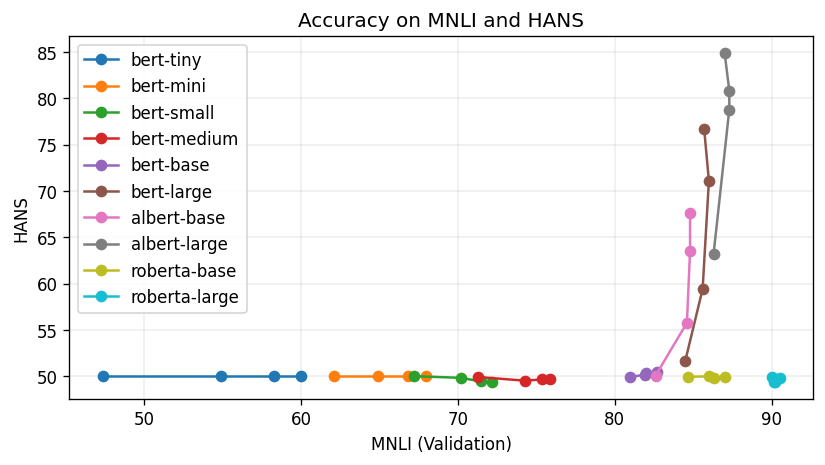

In [51]:
plt.figure(num=None, figsize = (8, 4), dpi=120)#, facecolor='w', edgecolor='k')
plt.plot(bert_tiny_mnli, bert_tiny_hans_avg_lo, marker = 'o', label='bert-tiny')
# plt.plot(bert_tiny_mnli, bert_tiny_hans_avg_sub, marker = 's', color='b')
# plt.plot(bert_tiny_mnli, bert_tiny_hans_avg_cons, marker = '^', color='b')

plt.plot(bert_mini_mnli, bert_mini_hans_avg_lo, marker = 'o', label='bert-mini')
# plt.plot(bert_mini_mnli, bert_mini_hans_avg_sub, marker = 's', color='g')
# plt.plot(bert_mini_mnli, bert_mini_hans_avg_cons, marker = '^',  color='g')

plt.plot(bert_small_mnli, bert_small_hans_avg_lo, marker = 'o', label='bert-small')
# plt.plot(bert_small_mnli, bert_small_hans_avg_sub, marker = 's', color='r')
# plt.plot(bert_small_mnli, bert_small_hans_avg_cons, marker = '^',  color='r')

plt.plot(bert_medium_mnli, bert_medium_hans_avg_lo, marker = 'o', label='bert-medium')
# plt.plot(bert_medium_mnli, bert_medium_hans_avg_sub, marker = 's', color='c')
# plt.plot(bert_medium_mnli, bert_medium_hans_avg_cons, marker = '^', color='c')

plt.plot(bert_base_mnli, bert_base_hans_avg_lo, marker = 'o', label='bert-base')
# plt.plot(bert_base_mnli, bert_base_hans_avg_sub, marker = 's',  color='m')
# plt.plot(bert_base_mnli, bert_base_hans_avg_cons, marker = '^', color='m')

plt.plot(bert_large_mnli, bert_large_hans_avg_lo, marker = 'o',  label='bert-large')
# plt.plot(bert_large_mnli, bert_large_hans_avg_sub, marker = 's', color='y')
# plt.plot(bert_large_mnli, bert_large_hans_avg_cons, marker = '^', color='y')

plt.plot(albert_base_mnli, albert_base_hans_avg_lo, marker = 'o', label='albert-base')
# plt.plot(albert_base_mnli, albert_base_hans_avg_sub, marker = 's', color='k')
# plt.plot(albert_base_mnli, albert_base_hans_avg_cons, marker = '^', color='k')

plt.plot(albert_large_mnli, albert_large_hans_avg_lo, marker = 'o',  label='albert-large')
# plt.plot(albert_large_mnli, albert_large_hans_avg_sub, marker = 's', color='orange')
# plt.plot(albert_large_mnli, albert_large_hans_avg_cons, marker = '^', label='albert-large', color='orange')


plt.plot(roberta_base_mnli, roberta_base_hans_avg_lo, marker = 'o', label='roberta-base')
# plt.plot(roberta_base_mnli, roberta_base_hans_avg_sub, marker = 's',  color='purple')
# plt.plot(roberta_base_mnli, roberta_base_hans_avg_cons, marker = '^',  color='purple')


plt.plot(roberta_large_mnli, roberta_large_hans_avg_lo, marker = 'o', label='roberta-large')
# plt.plot(roberta_large_mnli, roberta_large_hans_avg_sub, marker = 's', color='pink')
# plt.plot(roberta_large_mnli, roberta_large_hans_avg_cons, marker = '^', color='pink')

plt.xlabel('MNLI (Validation)')
plt.ylabel('HANS')
plt.legend()
plt.grid(linestyle='-', linewidth=0.2)
plt.title('Accuracy on MNLI and HANS')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/bigger_smaller_mnli_hans.pdf', 
            bbox_inches='tight', dpi=120)
# plt.show(aspect='auto')



## The big plot

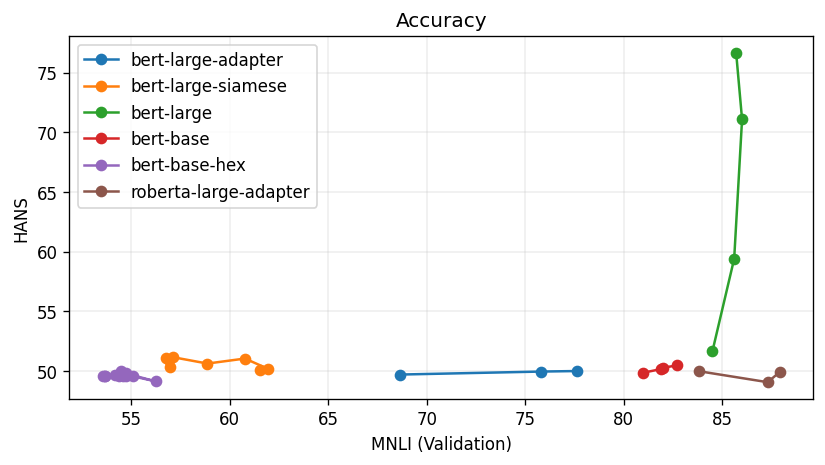

In [106]:
plt.figure(num=None, figsize = (8, 4), dpi=120)#, facecolor='w', edgecolor='k')

plt.plot(adapter_mnli_bert_large , adapter_bert_large_hans_avg_lo, marker = 'o', label='bert-large-adapter')
plt.plot(siamese_bert_large_mnli, siamese_bert_large_hans_avg_lo, marker = 'o', label='bert-large-siamese')
plt.plot(bert_large_mnli, bert_large_hans_avg_lo, marker = 'o',  label='bert-large')
plt.plot(bert_base_mnli, bert_base_hans_avg_lo, marker = 'o',  label='bert-base')
plt.plot(hex_mnli, hex_hans_avg_lo, marker = 'o',  label='bert-base-hex')
# plt.plot(centroids_samples_mnli, centroids_samples_hans_avg_lo[:16], marker = 'o',  label='bert-base-centroid')
# plt.plot(bert_large_maml_mnli, bert_large_maml_hans_avg_lo, marker = 'o',  label='bert-large-maml')

plt.plot(adapter_mnli_roberta_large, adapter_roberta_large_hans_avg_lo, marker = 'o',  label='roberta-large-adapter')

plt.xlabel('MNLI (Validation)')
plt.ylabel('HANS')
plt.legend()
plt.grid(linestyle='-', linewidth=0.2)
plt.title('Accuracy')
plt.savefig('/home/nlp/transformers-importance-sampling/figs/mother_plot.pdf', 
            bbox_inches='tight', dpi=120)
plt.show()

